<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="../../../oxDNA.png">
</center>

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Duplex Melting</font></h2> 

In [1]:
from ipy_oxdna.umbrella_sampling import MeltingUmbrellaSampling
from ipy_oxdna.oxdna_simulation import SimulationManager, Simulation, Observable
from ipy_oxdna.vmmc import *

import os
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Potential Energy Umbrella Temperature Interpolation</font></h2> 

In [11]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'external_force_file'

conditions = ['5']

systems = [f'duplex_52_{stiff}_test' for stiff in conditions]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


xmin = 0
xmax = 15
n_windows = 100
starting_r0 = 0.4213
stiff = 5
print_every = 1e4
temperature = '52C'
name = 'all_observables.txt'

pre_eq_steps = 5e6
eq_steps = 1e8
prod_steps = 1e9

verlet_skin = 0.5

hb_contact_filename = 'hb_contacts.txt'

com_list = ','.join('8,9,10,11,12,13,14,15'.split(',')[::-1])
ref_list = '0,1,2,3,4,5,6,7'

particle_indexes = [com_list, ref_list]
hb_contact_observable = [{'idx':particle_indexes, 'name':f'{hb_contact_filename}', 'print_every':int(print_every)}]


pre_equlibration_parameters_list = [{'backend':'CPU',"CUDA_list": "no",'use_edge': 'false','steps':f'{pre_eq_steps}','print_energy_every': f'{pre_eq_steps}',
                           'print_conf_interval':f'{pre_eq_steps}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}' }
                            for _ in conditions]

equlibration_parameters_list = [{'backend':'CPU',"CUDA_list": "no",'use_edge': 'false','steps':f'{eq_steps}','print_energy_every': f'{eq_steps}',
                           'print_conf_interval':f'{eq_steps/10}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}'}
                            for _ in conditions]

production_parameters_list = [{'backend':'CPU',"CUDA_list": "no",'use_edge': 'false','steps':f'{prod_steps}','print_energy_every': f'{prod_steps}',
                           'print_conf_interval':f'{prod_steps/10}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}'}
                            for _ in conditions]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]
simulation_manager = SimulationManager()

In [12]:
for us, pre_equlibration_parameters in zip(us_list, pre_equlibration_parameters_list):
    print(us.system)
    us.build_pre_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, pre_equlibration_parameters, starting_r0, pre_eq_steps,
                               print_every=print_every, observable=True, protein=None,
                               force_file=True, continue_run=False, name=name, custom_observable=hb_contact_observable)

duplex_52_5_test


In [ ]:
#I need to implement a way to modify the force.js to contain group_name, where the group name of the dict is the key of item
#such that I can create objervables which output the force_energy of every individual external potential.

#Once I have done that, I will be able to use the potential energy output to the file all_observables.txt in analysis.
#I will be using a non-parametric potential energy weighting scheme

#by taking summing over the exp(-beta*(U_i - f) for each window, and then dividing by the sum of the exp(-beta*U) for all windows.

In [4]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

spawning


Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55
Running: 56
Running: 57
Running: 58
Running: 59
Running: 60
Running: 61
Running: 62
Running: 63
Running: 64
Running: 65
Running: 66
Running: 67
Running: 68
Running: 69
Running: 70
Running: 71
Running: 72
Running: 73
Running: 74
Running: 75
Running: 76
Running: 77
Running: 78
Running: 79
Running: 80
Running: 81
Running: 82
Running: 83
Ru

INFO: Lists updated 18836 times (every ~265.449140 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.087 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00111 MB/s

INFO: Lists updated 18336 times (every ~272.687609 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.306 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 18584 times (every ~269.048644 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.359 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00113 MB/s



Run time: 80.48126561474055
Finished: 87
Run time: 83.5042190309614
Finished: 60
Run time: 82.9293093951419
Finished: 67
Run time: 80.23835136927664
Finished: 92


INFO: Lists updated 18868 times (every ~264.998940 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.074 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00108 MB/s

INFO: Lists updated 19309 times (every ~258.946605 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.173 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 18497 times (every ~270.314105 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.913 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00109 MB/s

INFO: Lists updated 18717 times (every ~267.136827 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.282 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00113 MB/s



Run time: 83.43438227195293
Finished: 65
Run time: 80.15876067429781
Finished: 96
Run time: 81.93115953914821
Finished: 80
Run time: 81.30388936214149
Finished: 86
Run time: 80.44553919229656
Finished: 94


INFO: Lists updated 18801 times (every ~265.943301 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.052 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00108 MB/s

INFO: Lists updated 18568 times (every ~269.280483 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.235 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 18452 times (every ~270.973336 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.990 KB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0011 MB/s

INFO: Lists updated 17998 times (every ~277.808645 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.132 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 18678 times (every ~267.694614 steps)
INFO: Aggregated I/O statistics (s

Run time: 82.40796156600118
Finished: 77
Run time: 82.45533563382924
Finished: 78
Run time: 82.6767708985135
Finished: 76
Run time: 83.46530534699559
Finished: 69


INFO: Lists updated 18357 times (every ~272.375661 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.193 KB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0011 MB/s

INFO: Lists updated 18824 times (every ~265.618360 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.064 KB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0011 MB/s

INFO: Lists updated 18549 times (every ~269.556310 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.181 KB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0011 MB/s

INFO: Lists updated 18330 times (every ~272.776869 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.056 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00108 MB/s



Run time: 80.3220637999475
Finished: 99
Run time: 81.54517415631562
Finished: 89
Run time: 84.81482100300491
Finished: 59
Run time: 82.15354519896209
Finished: 84


INFO: Lists updated 18481 times (every ~270.548131 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.086 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00113 MB/s

INFO: Lists updated 18211 times (every ~274.559332 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.164 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00111 MB/s

INFO: Lists updated 18798 times (every ~265.985743 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.887 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00106 MB/s

INFO: Lists updated 19373 times (every ~258.091158 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.050 KB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0011 MB/s



Run time: 83.71515261474997
Finished: 70
Run time: 84.5634479848668
Finished: 64


INFO: Lists updated 18793 times (every ~266.056510 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.022 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00108 MB/s



Run time: 84.24380339123309
Finished: 68
Run time: 81.94631281215698
Finished: 90
Run time: 83.90329222474247
Finished: 72


INFO: Lists updated 18000 times (every ~277.777778 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.823 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00107 MB/s

INFO: Lists updated 17998 times (every ~277.808645 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.008 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00107 MB/s

INFO: Lists updated 17864 times (every ~279.892521 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.931 KB written to files
INFO: Lists updated 18164 times (every ~275.269764 steps)
	124.000  B written to stdout/stderr
	For a total of  0.00108 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.053 KB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0011 MB/s



Run time: 81.3996075084433
Finished: 97
Run time: 82.24370675161481
Finished: 91
Run time: 82.05051063746214
Finished: 93


INFO: Lists updated 18493 times (every ~270.372573 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.111 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00111 MB/s

INFO: Lists updated 18148 times (every ~275.512453 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.336 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00111 MB/s

INFO: Lists updated 18795 times (every ~266.028199 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.146 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00111 MB/s



Run time: 83.12095819041133
Finished: 88
Run time: 82.15054803621024
Finished: 98


INFO: Lists updated 18078 times (every ~276.579268 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.114 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00109 MB/s

INFO: Lists updated 18018 times (every ~277.500278 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.966 KB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0011 MB/s



Run time: 85.79941818397492
Finished: 66
Run time: 83.83284171111882
Finished: 85
Run time: 85.04016539361328
Finished: 74


INFO: Lists updated 18617 times (every ~268.571736 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.030 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00106 MB/s

INFO: Lists updated 18759 times (every ~266.538728 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.218 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00108 MB/s

INFO: Lists updated 17375 times (every ~287.769784 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.950 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00106 MB/s



Run time: 87.95663393475115
Finished: 51
Run time: 84.97949684783816
Finished: 79


INFO: Lists updated 17601 times (every ~284.074768 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.920 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00102 MB/s

INFO: Lists updated 18179 times (every ~275.042632 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.229 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00107 MB/s



Run time: 88.20938746631145
Finished: 57
Run time: 88.70227754302323
Finished: 53
Run time: 84.15370845329016
Finished: 95
Run time: 89.5461915479973
Finished: 46


INFO: Lists updated 18668 times (every ~267.838012 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.017 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00102 MB/s

INFO: Lists updated 18625 times (every ~268.456376 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.932 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00101 MB/s

INFO: Lists updated 17858 times (every ~279.986561 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.145 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00108 MB/s

INFO: Lists updated 18275 times (every ~273.597811 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.731 KB written to files
	124.000  B written to stdout/stderr
	For a total of    0.001 MB/s



Run time: 88.01115788053721
Finished: 61


INFO: Lists updated 18213 times (every ~274.529182 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.090 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00103 MB/s



Run time: 89.78564596176147
Finished: 47
Run time: 88.14551815297455
Finished: 63
Run time: 89.09681920986623
Finished: 55


INFO: Lists updated 19103 times (every ~261.738994 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.854 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00101 MB/s

INFO: Lists updated 18723 times (every ~267.051220 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.015 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00103 MB/s

INFO: Lists updated 16697 times (every ~299.454992 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.713 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00101 MB/s



Run time: 88.54289650078863
Finished: 62
Run time: 86.45228858012706
Finished: 82


INFO: Lists updated 18422 times (every ~271.414613 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.787 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00102 MB/s

INFO: Lists updated 18570 times (every ~269.251481 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.166 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00105 MB/s



Run time: 91.04014677088708
Finished: 42
Run time: 89.95504647865891
Finished: 54
Run time: 87.89704645052552
Finished: 73


INFO: Lists updated 17605 times (every ~284.010224 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.547 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000984 MB/s

INFO: Lists updated 18929 times (every ~264.144963 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.901 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00101 MB/s

INFO: Lists updated 18155 times (every ~275.406224 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.977 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00103 MB/s



Run time: 87.71500355005264
Finished: 75
Run time: 89.60018369555473
Finished: 58


INFO: Lists updated 17148 times (every ~291.579193 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 87.154 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00103 MB/s

INFO: Lists updated 17053 times (every ~293.203542 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.860 KB written to files
	124.000  B written to stdout/stderr
	For a total of    0.001 MB/s



Run time: 90.1610670266673
Finished: 56
Run time: 90.9707667697221
Finished: 50


INFO: Lists updated 18088 times (every ~276.426360 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.708 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000996 MB/s

INFO: Lists updated 18356 times (every ~272.390499 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.831 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000987 MB/s



Run time: 92.21936459559947
Finished: 44


INFO: Lists updated 17489 times (every ~285.893991 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.832 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000973 MB/s



Run time: 92.5419241078198
Finished: 45
Run time: 92.21951446682215
Finished: 49


INFO: Lists updated 18391 times (every ~271.872111 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.681 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000969 MB/s

INFO: Lists updated 17364 times (every ~287.952085 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.711 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000973 MB/s



Run time: 93.01305101811886
Finished: 43


INFO: Lists updated 18180 times (every ~275.027503 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.776 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000966 MB/s



Run time: 92.8631421905011
Finished: 48
Run time: 94.06373152323067
Finished: 38


INFO: Lists updated 17699 times (every ~282.501836 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.726 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000966 MB/s

INFO: Lists updated 18410 times (every ~271.591526 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.824 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000954 MB/s



Run time: 92.86169483978301
Finished: 52


INFO: Lists updated 17707 times (every ~282.374202 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.734 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000966 MB/s



Run time: 94.73912624828517
Finished: 40


INFO: Lists updated 18198 times (every ~274.755468 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.591 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000943 MB/s



Run time: 94.8744540894404
Finished: 41


INFO: Lists updated 18001 times (every ~277.762347 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.595 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000943 MB/s



Run time: 97.17307307012379
Finished: 34


INFO: Lists updated 18371 times (every ~272.168091 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.455 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000919 MB/s



Run time: 97.16009965352714
Finished: 39
Run time: 98.464202019386
Finished: 27
Run time: 98.10552220139652
Finished: 31
Run time: 98.41951840929687
Finished: 29


INFO: Lists updated 17953 times (every ~278.504985 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.466 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00092 MB/s

INFO: Lists updated 17048 times (every ~293.289535 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.444 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000903 MB/s

INFO: Lists updated 18008 times (every ~277.654376 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.538 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00091 MB/s

INFO: Lists updated 18645 times (every ~268.168410 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.302 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000903 MB/s



Run time: 97.70944820623845
Finished: 36


INFO: Lists updated 16712 times (every ~299.186213 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.318 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000912 MB/s



Run time: 98.62135517410934
Finished: 32


INFO: Lists updated 16741 times (every ~298.667941 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.297 KB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0009 MB/s



Run time: 98.52578002586961
Finished: 35


INFO: Lists updated 17412 times (every ~287.158282 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.497 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000904 MB/s



Run time: 99.4974943511188
Finished: 28


INFO: Lists updated 17596 times (every ~284.155490 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.277 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000892 MB/s



Run time: 98.84209733642638
Finished: 37


INFO: Lists updated 16954 times (every ~294.915654 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.508 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000904 MB/s



Run time: 101.09414683096111
Finished: 26


INFO: Lists updated 15979 times (every ~312.910695 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.486 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000878 MB/s



Run time: 100.98069454915822
Finished: 33


INFO: Lists updated 16324 times (every ~306.297476 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.389 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000888 MB/s



Run time: 102.52886685170233
Finished: 25


INFO: Lists updated 17229 times (every ~290.208370 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.315 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000864 MB/s



Run time: 102.688861226663
Finished: 30


INFO: Lists updated 16340 times (every ~305.997552 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.302 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000864 MB/s



Run time: 105.24149653315544
Finished: 24


INFO: Lists updated 17939 times (every ~278.722337 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.437 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000843 MB/s



Run time: 107.19413947500288
Finished: 20


INFO: Lists updated 17207 times (every ~290.579415 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.450 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000828 MB/s



Run time: 108.47219608165324
Finished: 22


INFO: Lists updated 17268 times (every ~289.552930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.151 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000814 MB/s



Run time: 108.58803522121161
Finished: 23


INFO: Lists updated 17197 times (every ~290.748386 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.168 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000814 MB/s



Run time: 109.09314149059355
Finished: 21


INFO: Lists updated 16972 times (every ~294.602875 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.229 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000811 MB/s



Run time: 110.69036038499326
Finished: 18


INFO: Lists updated 16743 times (every ~298.632264 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.996 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000796 MB/s



Run time: 112.05051811411977
Finished: 17


INFO: Lists updated 16564 times (every ~301.859454 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.909 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000784 MB/s



Run time: 112.75329236406833
Finished: 19


INFO: Lists updated 16811 times (every ~297.424306 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 86.027 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000783 MB/s



Run time: 118.14681999199092
Finished: 16


INFO: Lists updated 16336 times (every ~306.072478 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.907 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000744 MB/s



Run time: 121.48857859428972
Finished: 15


INFO: Lists updated 14588 times (every ~342.747464 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.830 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000722 MB/s



Run time: 122.06740098446608
Finished: 13


INFO: Lists updated 15836 times (every ~315.736297 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.697 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000718 MB/s



Run time: 123.29436400346458
Finished: 10


INFO: Lists updated 15336 times (every ~326.030256 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.602 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000707 MB/s



Run time: 123.33043561596423
Finished: 14


INFO: Lists updated 15309 times (every ~326.605265 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.743 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000709 MB/s



Run time: 125.37501549907029
Finished: 12


INFO: Lists updated 14974 times (every ~333.912114 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.584 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000696 MB/s



Run time: 126.97795670945197
Finished: 11


INFO: Lists updated 14701 times (every ~340.112917 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.562 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000687 MB/s



Run time: 129.07855231314898
Finished: 9


INFO: Lists updated 14686 times (every ~340.460302 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.565 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000675 MB/s



Run time: 129.5102934408933
Finished: 8
Run time: 129.73567454051226
Finished: 6


INFO: Lists updated 13300 times (every ~375.939850 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.510 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000672 MB/s

INFO: Lists updated 12700 times (every ~393.700787 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.552 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00067 MB/s



Run time: 131.29489961080253
Finished: 7


INFO: Lists updated 14178 times (every ~352.659049 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.622 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000664 MB/s



Run time: 134.99961040075868
Finished: 0
Run time: 134.85472079645842
Finished: 4


INFO: Lists updated 10665 times (every ~468.823254 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.586 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000644 MB/s

INFO: Lists updated 11351 times (every ~440.489825 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.600 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000645 MB/s



Run time: 135.15310747362673
Finished: 5
Run time: 135.59031398501247
Finished: 1


INFO: Lists updated 12170 times (every ~410.846343 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.547 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000644 MB/s

INFO: Lists updated 10720 times (every ~466.417910 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.530 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000641 MB/s



Run time: 136.14130047243088
Finished: 3


INFO: Lists updated 12287 times (every ~406.934158 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.491 KB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00064 MB/s



Run time: 137.56227604020387
Finished: 2


INFO: Lists updated 11095 times (every ~450.653447 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 85.565 KB written to files
	124.000  B written to stdout/stderr
	For a total of 0.000633 MB/s



All queued simulations finished in: 138.7244232147932


In [7]:
for us, equlibration_parameters in zip(us_list, equlibration_parameters_list):
    print(us.system)
    us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, equlibration_parameters, print_every=print_every,
                               observable=True, protein=None, force_file=True, continue_run=False, name=name, custom_observable=hb_contact_observable)

duplex_52_5


In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

In [25]:
for us, production_parameters in zip(us_list, production_parameters_list):
    print(us.system)
    us.build_production_runs(simulation_manager, n_windows, com_list, ref_list,
                             stiff, xmin, xmax, production_parameters,
                             observable=True, print_every=print_every ,protein=None,
                             force_file=True, continue_run=1e9, name=name, custom_observable=hb_contact_observable)

duplex_52_5


In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

In [ ]:
simulation_manager.terminate_all()

In [5]:
for us in us_list:
    us.observables_list = []
    us.com_distance_observable(com_list, ref_list, print_every=print_every, name=name)
    us.hb_list_observable(print_every=print_every, only_count='true', name=name)
    us.force_energy_observable(print_every=print_every, name=name)
    us.kinetic_energy_observable(print_every=print_every, name=name)
    us.potential_energy_observable(print_every=print_every, name=name)

all_observables = []
for us in us_list:
    all_observables.append(us.analysis.read_all_observables('pre_eq'))

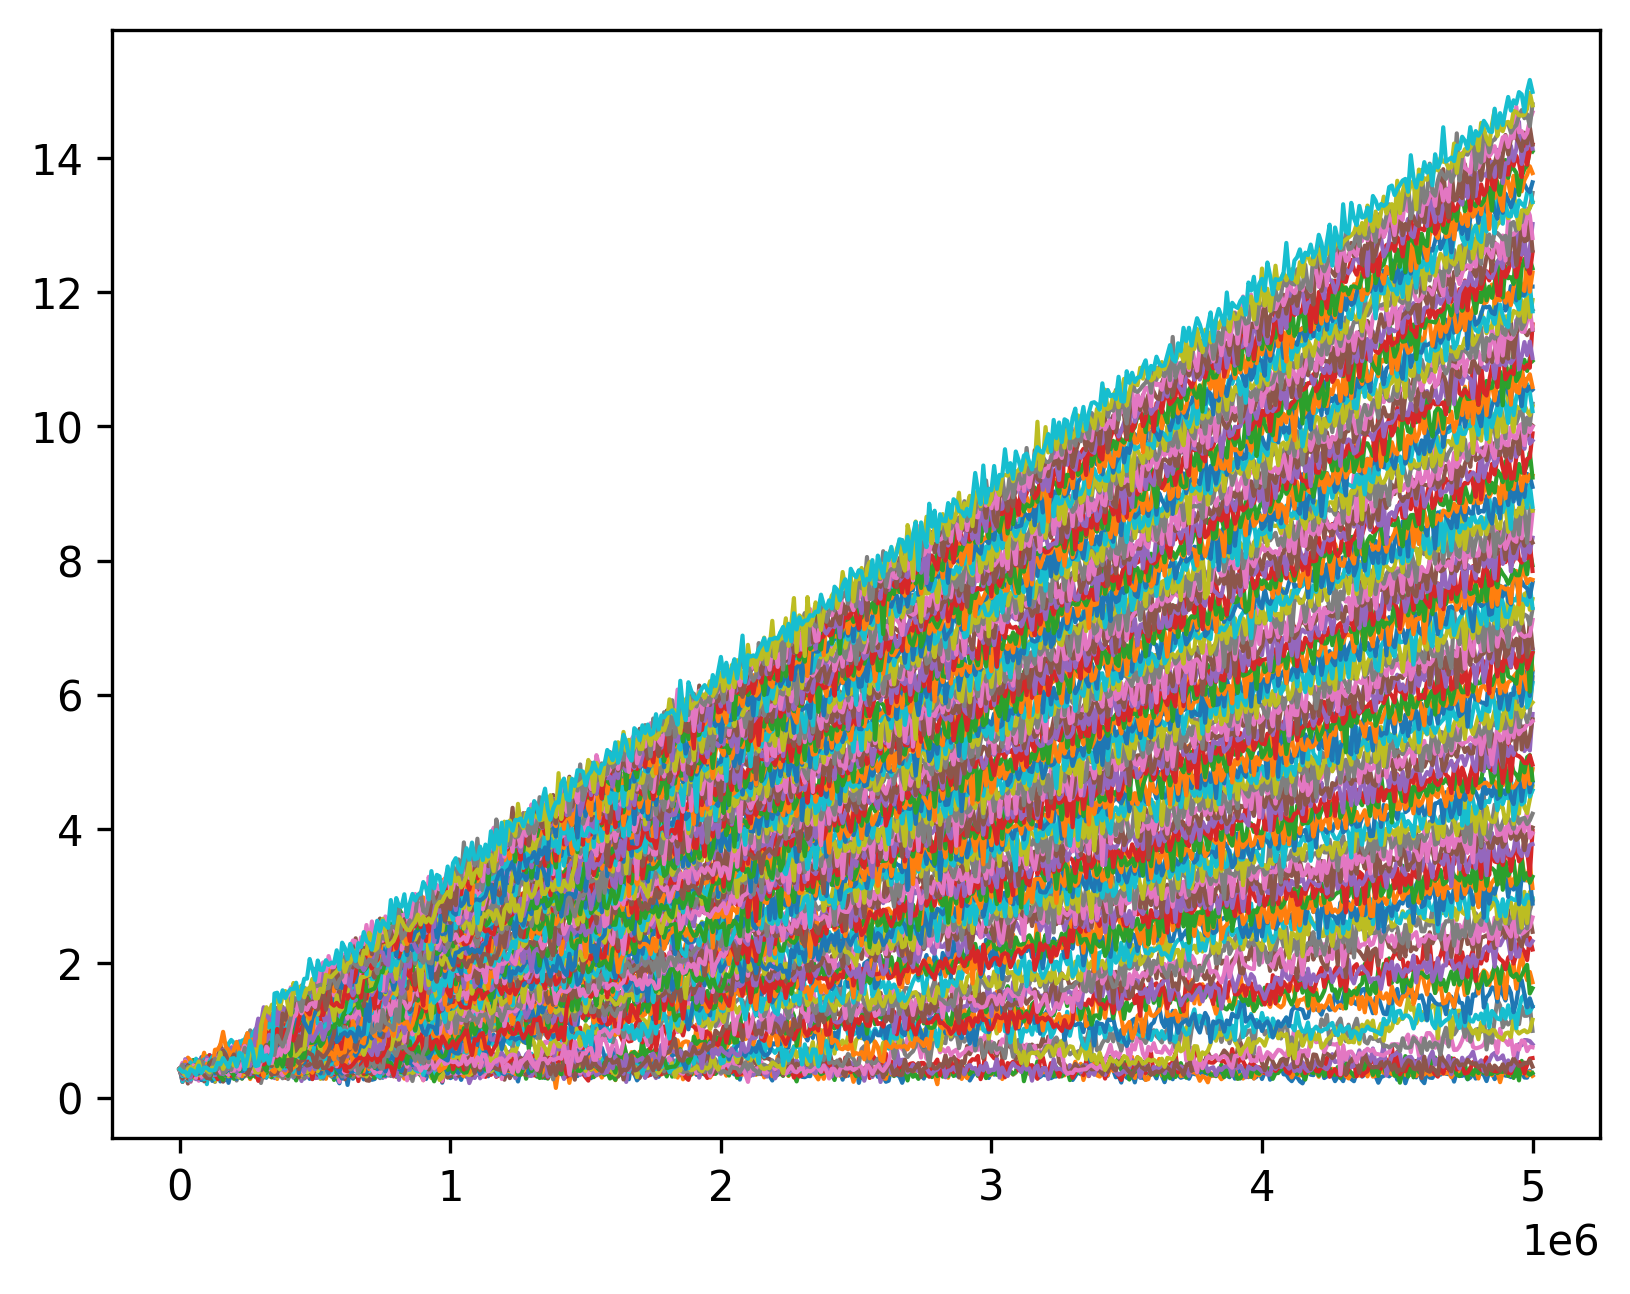

In [6]:
names = ['backbone', 'bonded_excluded_volume', 'stacking', 'nonbonded_excluded_volume', 'hydrogen_bonding', 'cross_stacking', 'coaxial_stacking', 'debye_huckel']
columns = ['com_distance', 'hb_list', 'force_energy', *names]

my_obs = all_observables[0]

fig, ax = plt.subplots(dpi=300)
for idx, obs in enumerate(my_obs):
    plt.plot(obs['steps'], obs['com_distance'].rolling(window=1).mean(), label=f'{idx}', linewidth=1)
# plt.legend(fontsize=1)

(-0.05, 1.05)

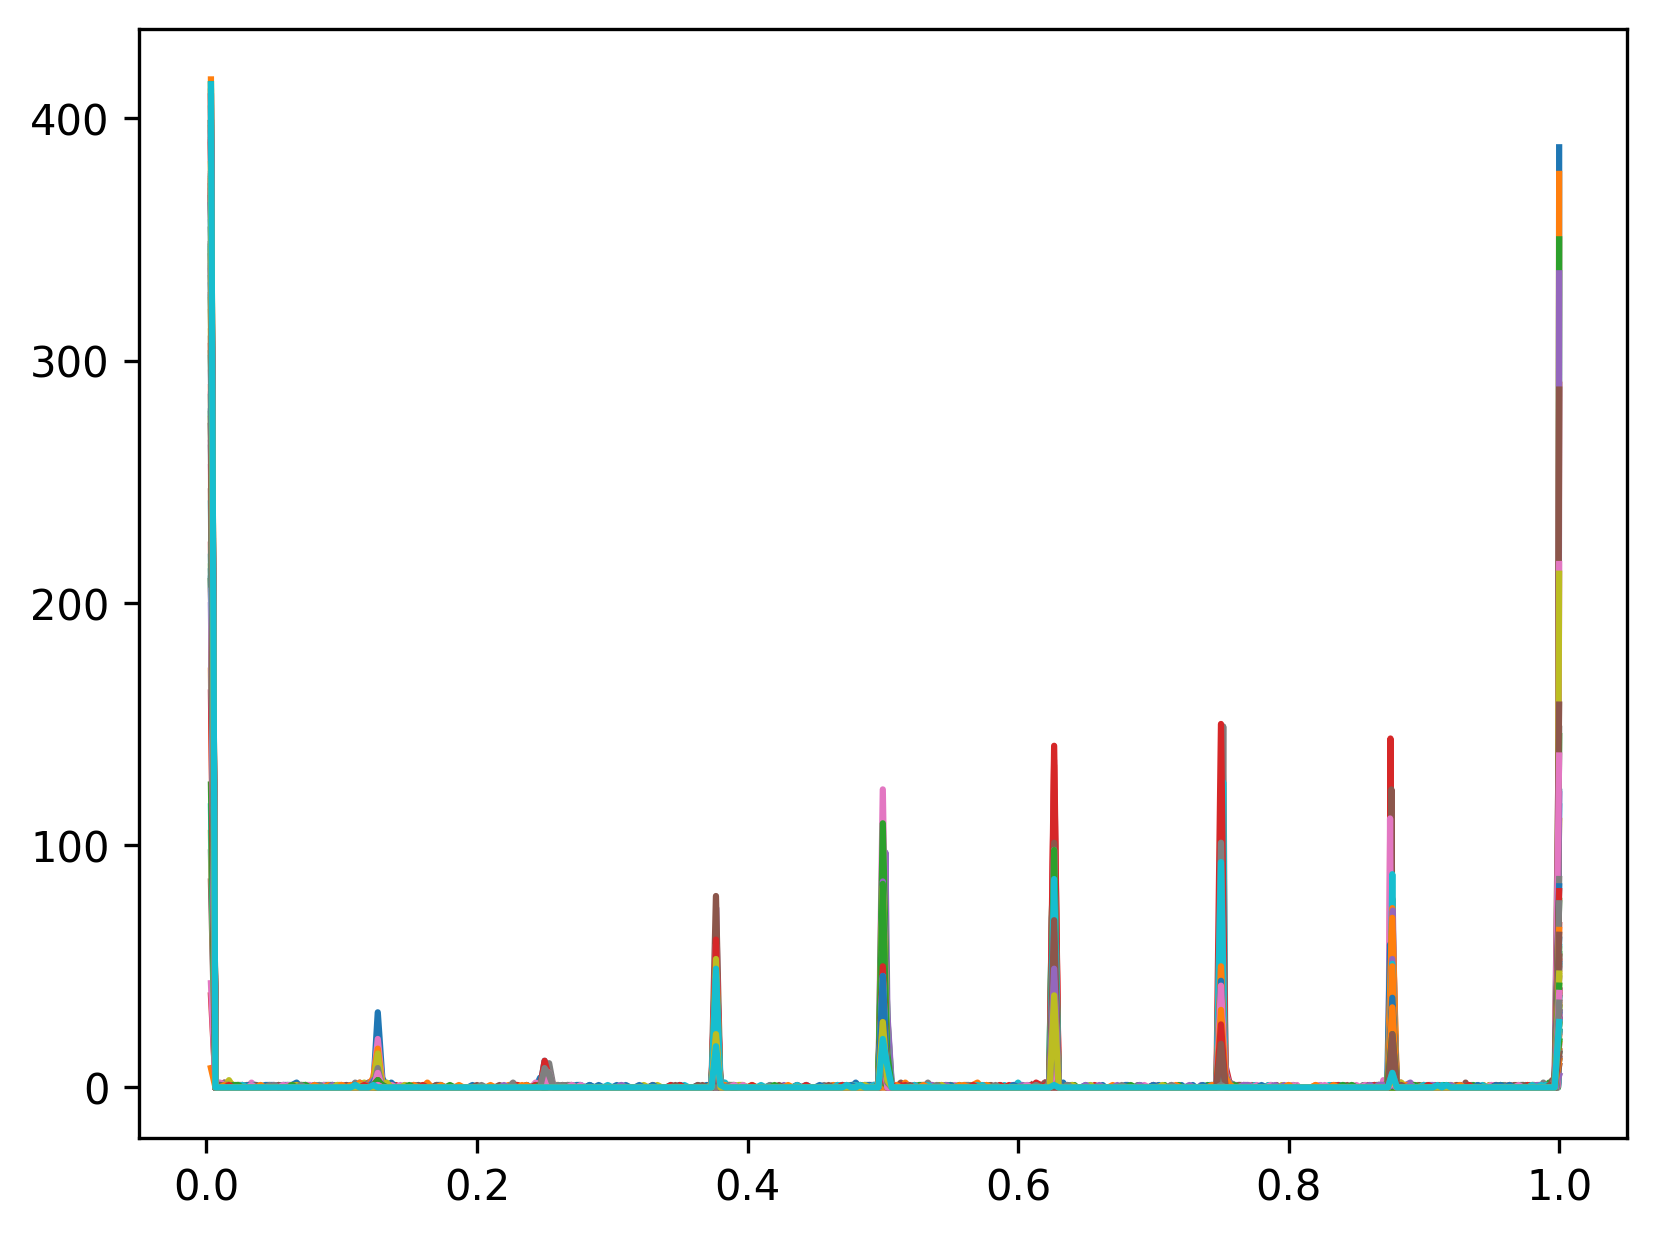

In [8]:
us_list[0].read_hb_contacts(sim_type='pre_eq')

min_len = min([len(inner_list) for inner_list in us_list[0].hb_contacts_by_window.values()])
truncated_hb_contacts_by_window = np.array([value[:min_len] for value in us_list[0].hb_contacts_by_window.values()]).squeeze()

fig, ax = plt.subplots(dpi=300)
for hb_contacts in truncated_hb_contacts_by_window:
    
    H, bins = np.histogram(hb_contacts, bins=300)
    ax.plot(bins[1:], H)
ax.set_xlim(-0.05, 1.05)

In [ ]:
for sim in us_list[0].pre_equlibration_sims[::5]:
    sim.analysis.view_last()

In [23]:
xmin = 0
xmax = 15
# temp_range = np.linspace(45, 65, 41)
# temp_range = np.array([52])
temp_range = np.array([20, 30, 40, 45, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 70, 80])
n_bins = 200
max_hb = 8
epsilon = 1e-5
convergence_slice = 1

us_list[0].wham_cont_and_disc_temp_interp_converg_analysis(convergence_slice, temp_range,
                                                           n_bins, xmin, xmax,max_hb,
                                                           epsilon=epsilon, reread_files=False,
                                                           all_observables=True)

WHAM | 9000/? [01:01<00:00, 146.16it/s, Convergence: 0.000013 / 1e-05]
/scratch/mlsample/ipy_oxDNA/ipy_oxdna/umbrella_sampling.py:1332: RuntimeWarning: divide by zero encountered in log
  free = -np.log(p_x)


Converged in [9644] iterations
64.96993987975952


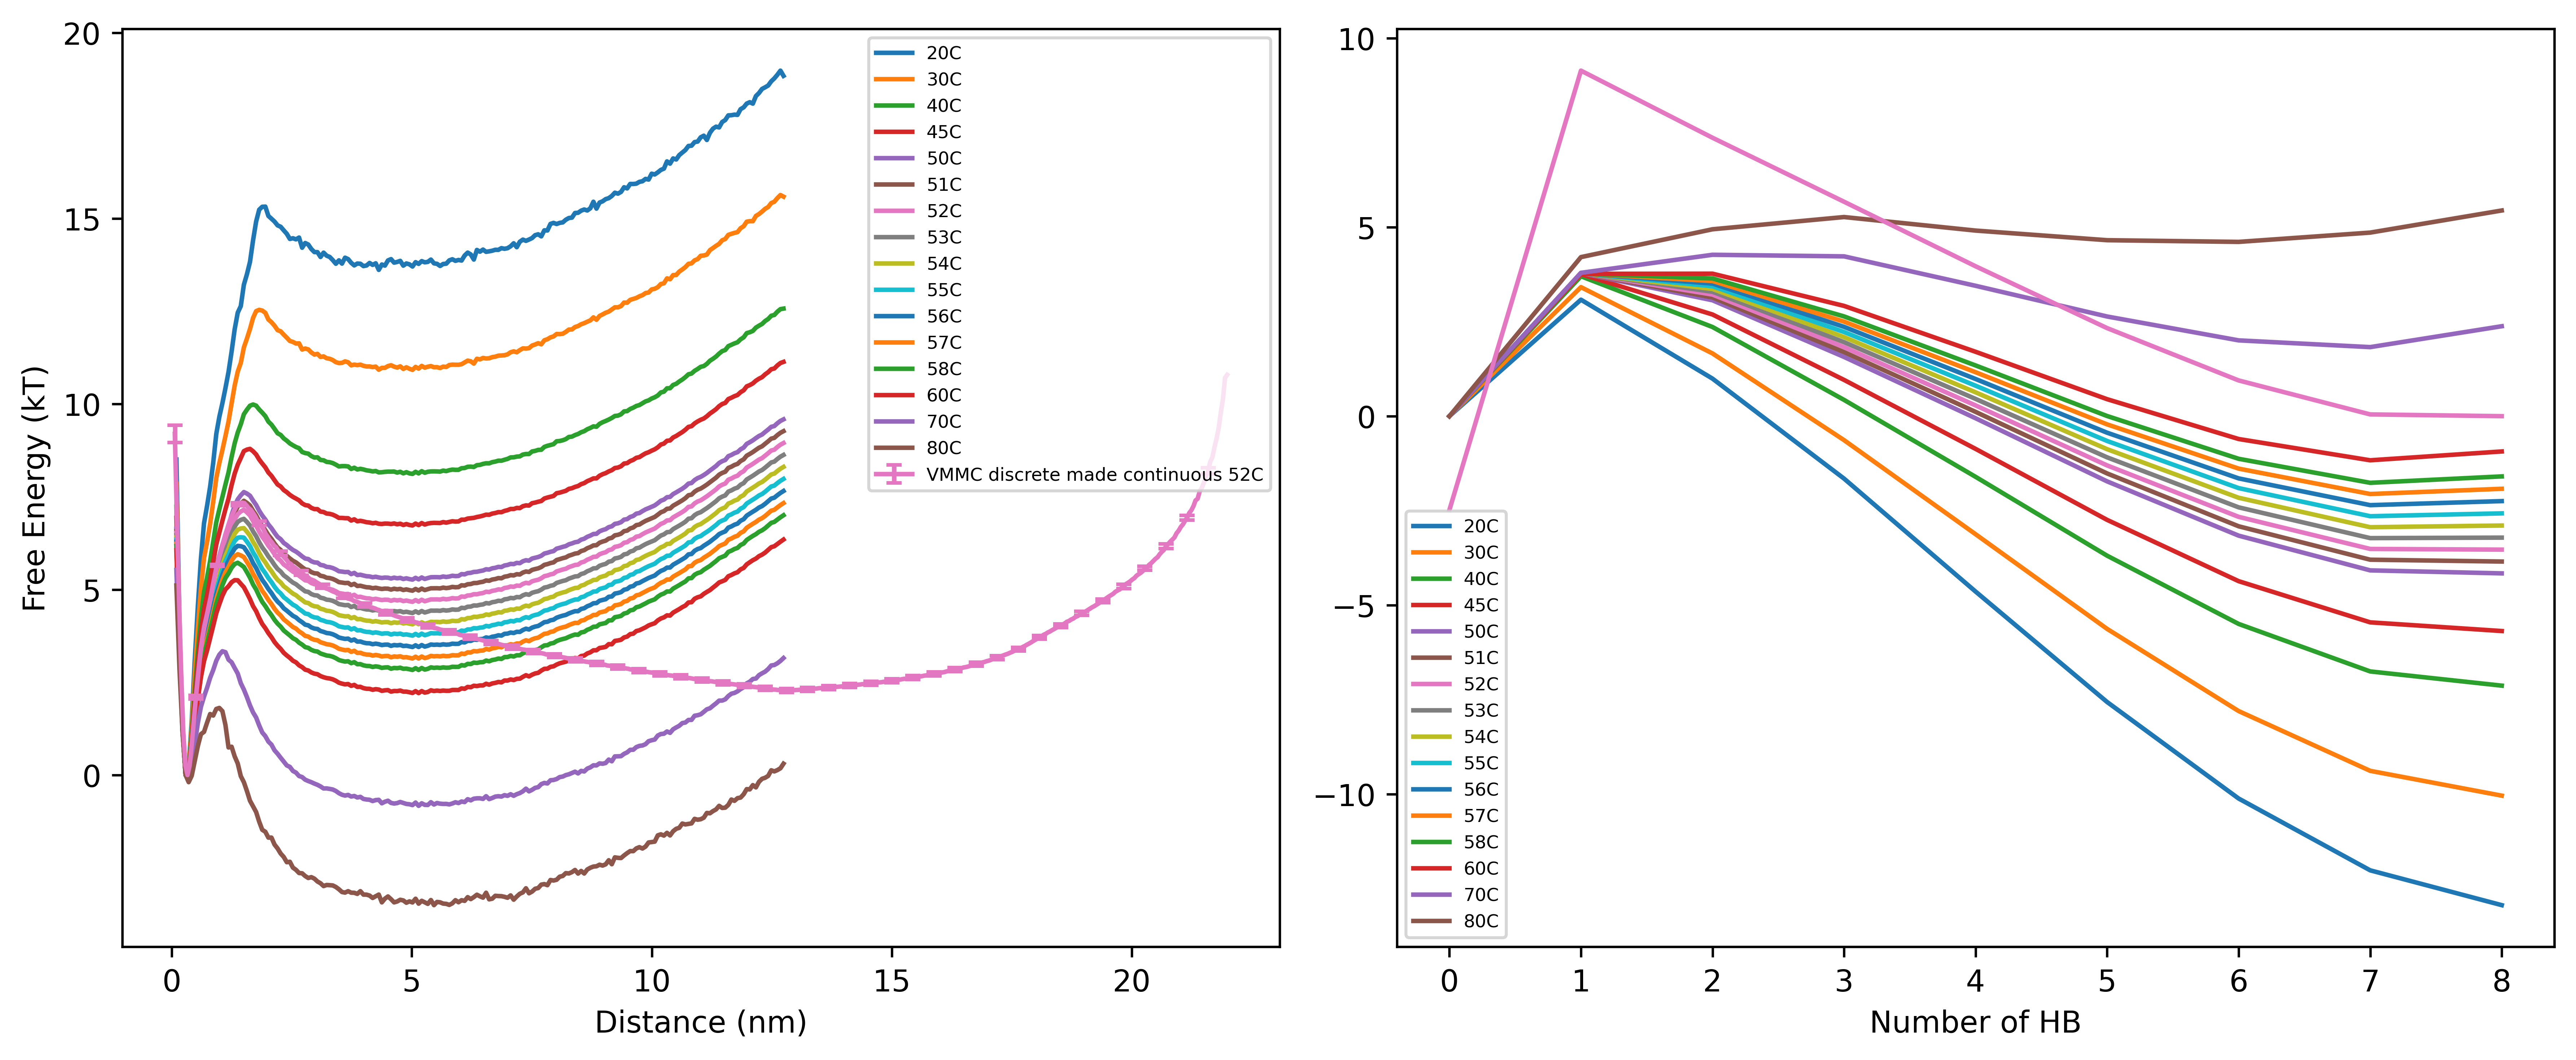

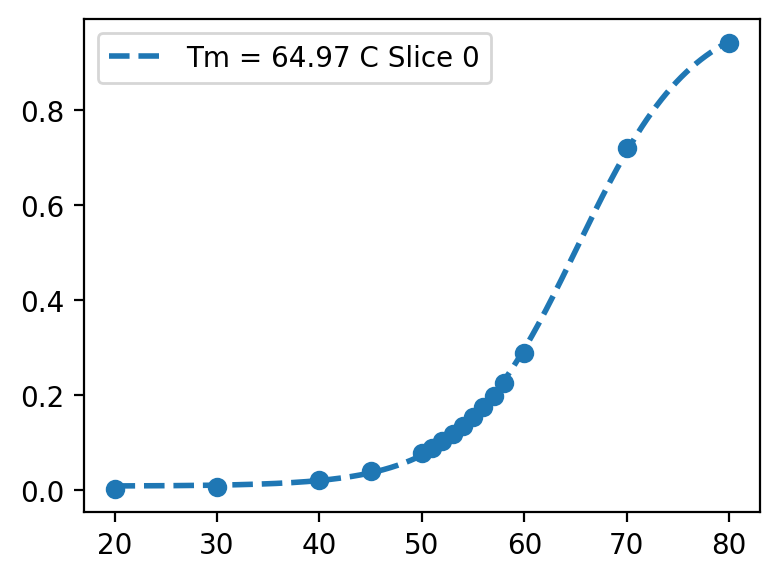

In [24]:
calculated_bin_centers, bin_edges = us_list[0].get_bins(xmin, xmax, n_bins=n_bins)

fig, (ax1, ax2) = plt.subplots(1,2, dpi=600, figsize=(12,5), tight_layout=True)
fig, ax = plt.subplots(dpi=200, figsize=(4,3), tight_layout=True)

ax1.set_xlabel('Distance (nm)')
ax2.set_xlabel('Number of HB')

ax1.set_ylabel('Free Energy (kT)')
# ax2.set_ylabel('Free Energy (kT)')

# ax1.set_xlim(-0.6,14.5)
# ax2.set_xlim(-0.6,29)
# ax1.set_ylim(-0.6,20)

for idx, free in enumerate(us_list[0].convergence_free):            
    sub_index = free[0].argmin()
    for f, temp_val in zip(free, temp_range):
        if idx == 0:
            ax1.plot(calculated_bin_centers*0.8518, f - f[sub_index], label=f'{temp_val}C') 
        else:
            ax1.plot(calculated_bin_centers*0.8518, f - f[sub_index])
vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax1, confidence_level=0.95, label='VMMC discrete made continuous 52C')

        
ax1.legend(fontsize=6)


for idx, free_discrete in enumerate(us_list[0].convergence_discrete_free_energy):
    for f_discrete, temp_val in zip(free_discrete, temp_range):
        if idx == 0:
            ax2.plot(range(max_hb+1), f_discrete - f_discrete[0], label=f'{temp_val}C')
        else:
            ax2.plot(range(max_hb+1), f_discrete - f_discrete[0])
ax2.legend(fontsize=6)
ax2.plot(range(9), vmmc_sim_list[0].statistics['wt_free'] - vmmc_sim_list[0].statistics['wt_free'].values[-1])
label = ''

for idx, (inverted_finfs, x_fit, y_fit, Tm) in enumerate(zip(us_list[0].convergence_inverted_finfs, us_list[0].convergence_x_fit, us_list[0].convergence_y_fit, us_list[0].convergence_Tm)):
    ax.scatter(temp_range, inverted_finfs, marker='o')
    ax.plot(x_fit, y_fit, linestyle='--', linewidth=2, label=f'Tm = {Tm:.2f} C Slice {idx}')
    # ax.axvline(x=Tm, color='r', linestyle='--', linewidth=2, label=f'{label}Tm = {Tm:.2f} °C')
    ax.legend()   

In [9]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '400'
tol = '1e-5'
n_boot = '0'


xmin = [0]
xmax = [15]
n_windows = 100
stiff = 5
print_every = 1e4
temperature = '52C'
name = 'all_observables.txt'

pre_eq_steps = 1e6
eq_steps = 1e8
prod_steps = 1e9

for us in us_list:
    us.observables_list = []
    us.com_distance_observable(com_list, ref_list, print_every=print_every, name=name)
    us.hb_list_observable(print_every=print_every, only_count='true', name=name)
    us.force_energy_observable(print_every=print_every, name=name)
    us.potential_energy_observable(print_every=print_every, name=name)

for us, xmi, xma  in zip(us_list, xmin, xmax):
    us.wham_run(wham_dir, xmi, xma, stiff, n_bins, tol, n_boot, all_observables=True)
    
n_chunks = 2
data_added_per_iteration = 2

for us, xmi, xma  in zip(us_list, xmin, xmax):
    us.wham.get_n_data_per_com_file()
    us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmi, xma, stiff, n_bins, tol, n_boot)

Running WHAM analysis...
WHAM analysis completed
[0, 10813, 21626]
Running WHAM analysis...
WHAM analysis completed
Running WHAM analysis...
WHAM analysis completed
chunk convergence analysis
[0, 10813, 21626]
Running WHAM analysis...
WHAM analysis completed
Running WHAM analysis...
WHAM analysis completed
chunk convergence analysis


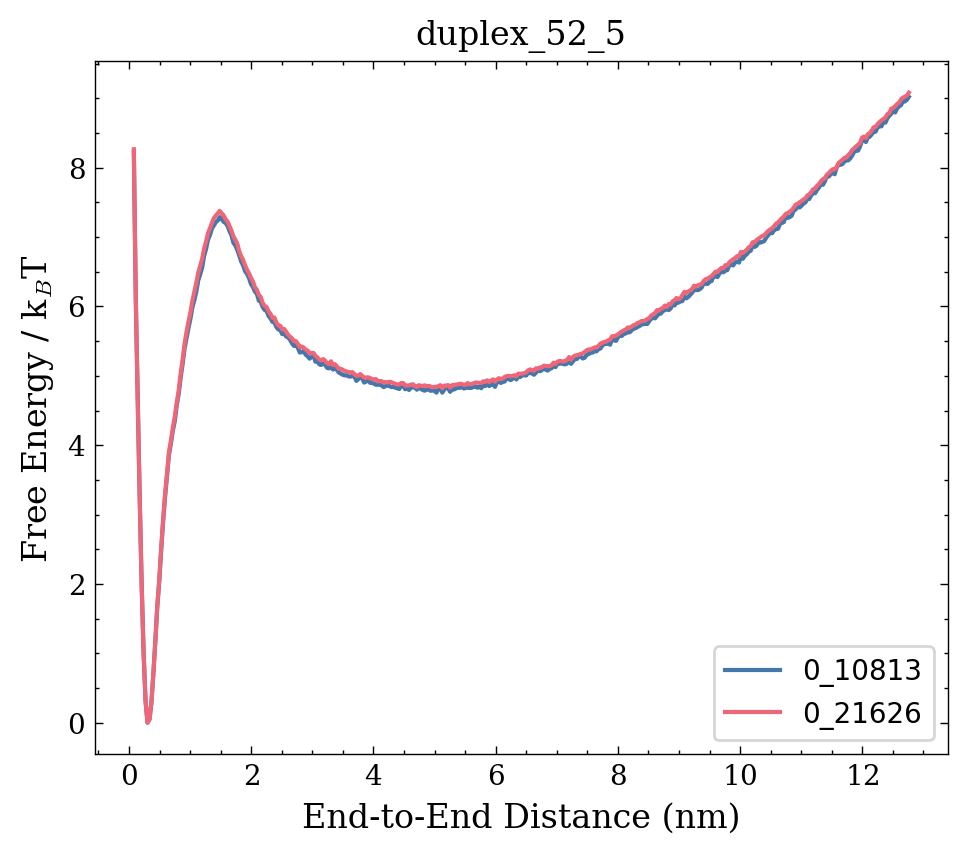

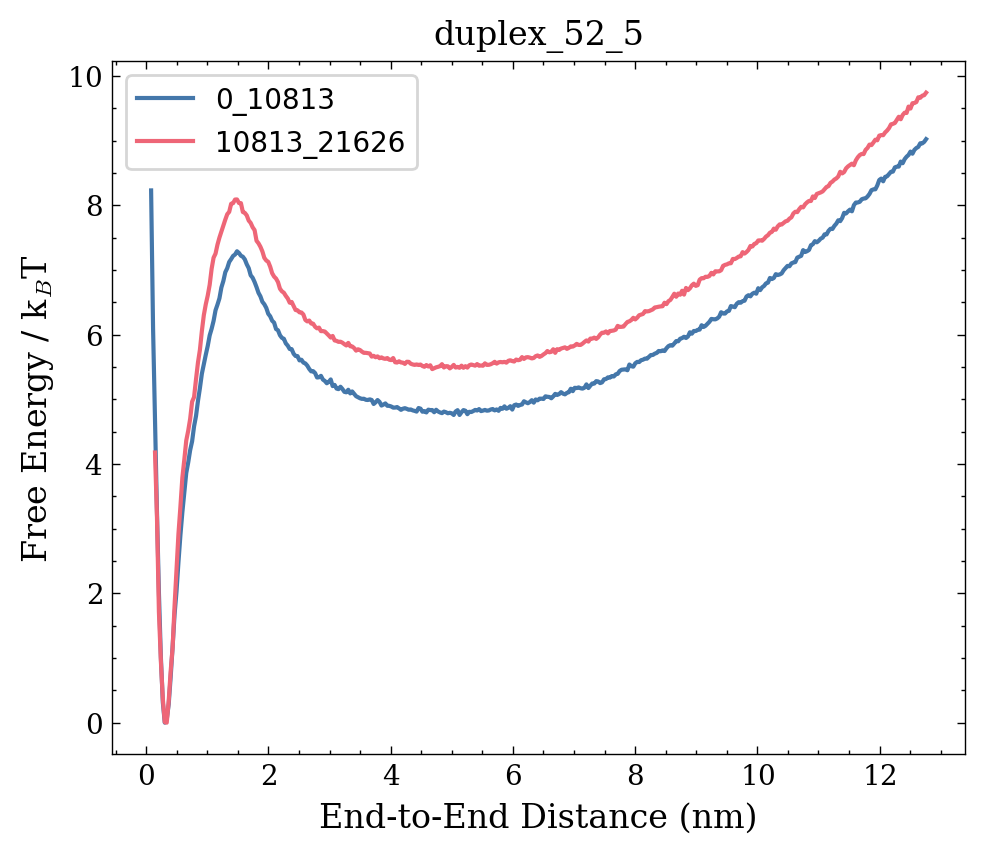

In [10]:
for us in us_list:
    us.wham.plot_truncated_free_energy()
    plt.legend()
    plt.title(us.system)
    us.wham.plot_chunks_free_energy()
    plt.legend()
    plt.title(us.system)

<font size='7'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Initalize Vmmc Replicas</font></h2> 

In [11]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
systems = ['duplex_melting']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/vmmc_melting_replicas/vmmc_melting_rep' for sys, file_dir in zip(systems, file_dir_list)]

n_replicas = 40
vmmc_replica_generator = VmmcReplicas()

vmmc_replica_generator.multisystem_replica(
    systems,
    n_replicas,
    file_dir_list,
    sim_dir_list
)
vmmc_sim_list = vmmc_replica_generator.sim_list
queue_of_simulations = vmmc_replica_generator.queue_of_sims

p1 = '15,14,13,12,11,10,9,8'
p2 = '0,1,2,3,4,5,6,7'
pre_defined_weights = [8, 16204, 1882.94, 359.746, 52.5898, 15.0591, 7.21252, 2.2498, 2.89783]

sim_parameters = {'T':'52C', 'steps':'1e9','print_energy_every': '1e5','print_conf_interval':'1e6'}

In [12]:
vmmc_replica_generatoranalysis.read_vmmc_op_data()
vmmc_sim_list[0].analysis.calculate_sampling_and_probabilities()


In [ ]:
vmmc_replica_generator

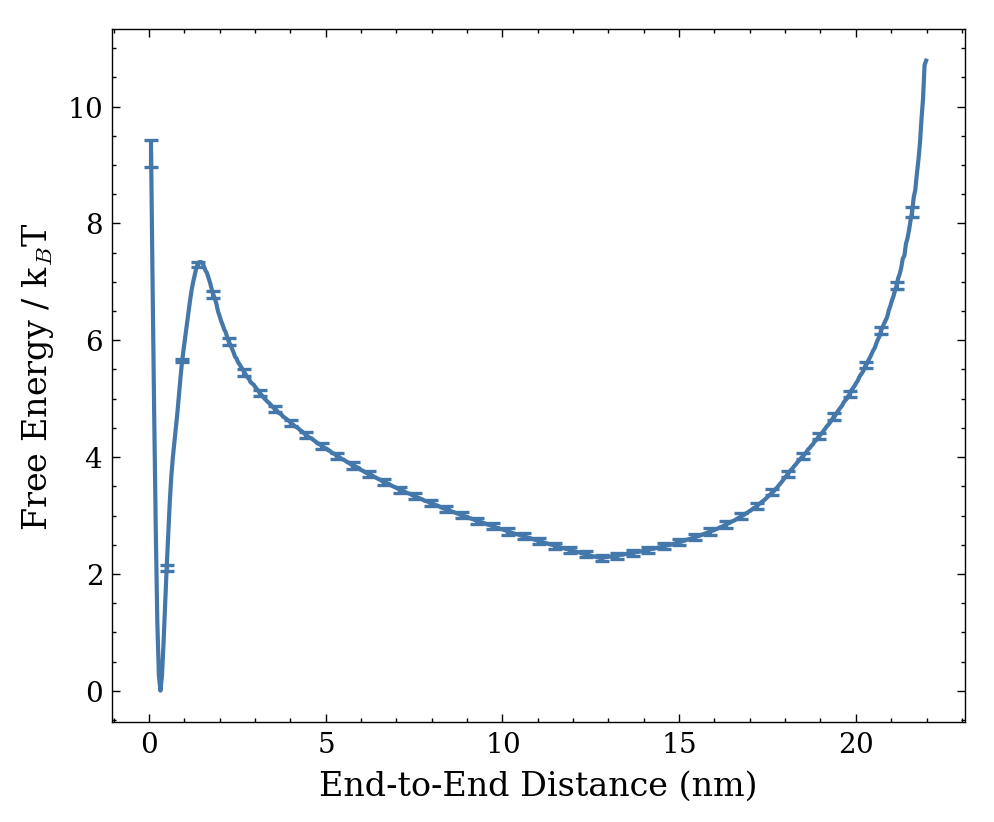

In [14]:
ax = us_list[0].wham.plt_fig()
vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')


In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']):
    ax = us.wham.plt_fig() 
    vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')
    # us_1.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuous umbrella sampling 52C all bonds')
    us.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuos umbrella sampling 52C only intended bonds')
    ax.set_xlim(-0.1,8)
    plt.ylim(-0.1,9)
plt.legend(fontsize=6)

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']):
    ax = us.wham.plt_fig() 
    # vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')
    us_1.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuous umbrella sampling 52C all bonds')
    us.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuos umbrella sampling 52C only intended bonds')
    # ax.set_xlim(-0.1,8)
    # plt.ylim(-0.1,9)
plt.legend(fontsize=6)